# <center> <font>Independent Component Analysis (ICA)</font>
## <center> Implementating Cocktail Party Problem using _Independent Component Analysis_
### <center>**Course:**<br>
<center>Tópicos Especiais em Processamento de sinais: Fusão e modelamento de sinais (ELE-405)<br>
### <center>**Authors:**<br>
<center>Carlos Felipe Emygdio de Melo - 00300848
<center>Tulio Dapper e Silva - 00194878
<center>Guilherme Severo Zandomeneghi - 00278481<br>
### <center>Lecturers<br>
<center>Valner João Brusamarello
<center>Diego Eckhard<br><br><br><br><br>
<center>**Federal University of Rio Grande do Sul-UFRGS-PPGEE**
<center>**Porto Alegre-RS**
<center>**12/04/2018**

## Importing Libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math as m
import librosa
import librosa.display
import IPython.display

## Loading Microphones' Audios

In [7]:
# Picman and shot gun
audio_path_1='audio/picman_gun_1.wav';
audio_path_2='audio/picman_gun_2.wav';

# Voice in english and voice in spanish
#audio_path_1='audio/voice_voice_1.wav';
#audio_path_2='audio/voice_voice_2.wav';

# Voice in engligh and song
#audio_path_1='audio/voice_and_song_1.wav';
#audio_path_2='audio/voice_and_song_2.wav';

# Loading audio files with librosa.
microphone1, sr1 = librosa.load(path=audio_path_1,sr=16000); 
microphone2, sr2 = librosa.load(path=audio_path_2,sr=16000);
entry_data = np.transpose(np.c_[microphone1, microphone2])
# Displaying audio files with librosa.
print("Audio 1")
IPython.display.display(IPython.display.Audio(data=microphone1, rate=sr1))
print("Audio 2")
IPython.display.display(IPython.display.Audio(data=microphone2, rate=sr2))

Audio 1


Audio 2


## Creating Data Matrix with Mixed Audio

Microphone (Mixed Audio) 1


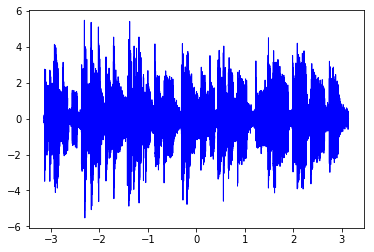

Microphone (Mixed Audio) 2


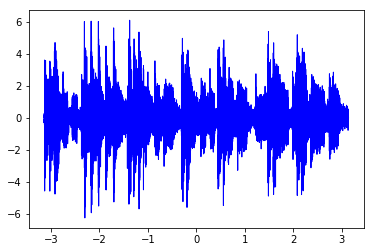

In [8]:
# Normalizing the data. 
microphone1 = microphone1/microphone1.std(axis=0)
microphone2 = microphone2/microphone2.std(axis=0)

# Dimensionality of data point. Change it with caution!
# This code was built for 2D data. If the data has more dimensions other changes will be necessary.
dimDat = 2 
numDat = np.size(microphone1)

# Time is axis x in the both plots below.
# Creates an array from -pi to pi with the size of the sample data.
# (endpoint = True -> includes the end limit)
time_axis = np.linspace(-np.pi, np.pi, numDat, endpoint=True)

# Plotting Audio 1.
print("Microphone (Mixed Audio) 1")
plt.plot(time_axis, microphone1, color="blue", linewidth=1.0, linestyle="-")
plt.show() 

# Plotting Audio 2.
print("Microphone (Mixed Audio) 2")
plt.plot(time_axis, microphone2, color="blue", linewidth=1.0, linestyle="-")
plt.show() 

# Finally, creates data matrix.
data = np.transpose(np.c_[microphone1, microphone2])

## Preprocessing for ICA

According to Aapo and Oja (2000), applying preprocessing techniques would make the problem of ICA estimation simpler and better conditioned. Firstly, the mixed data should be whitened in order to project them along two orthogonal axes yielding uncorrelated signals. Sounds familiar? It should, because projecting the data along 2 orthogonal axes yielding uncorrelated signals is what **PCA** does! To sum up, the data should be preprocessed using Principal Component Analysis.

In [9]:
# Principal Component Analysis

# Firstly, we should calculate the data mean.
# This function is calculating the mean of each line of the data matrix
# corresponding to each microphone signal.
dataMean = np.average(data,axis=1)                               

# Now, we subtract the data mean from the original values,
# creating the zeroMeanData which has the same dimension
# of the original data matrix.
zeroMeanData = data - dataMean.reshape((2,1))                    

# This step is not really necessary, but it should help to check if everything is running smoothly. 
# Here, we verify if the data has zero mean.
#print("\nNumerical mean of zero mean data (should be zero):\n", np.average(zeroMeanData,axis=1))

# Then, we calculate the covariance matrix from our normalized and zero mean data

$$C_{x} = \frac{1}{N}{xx^{T}}$$

where **x** is the vector of data and **N** is the number of samples.

In [10]:
CovData = np.dot(zeroMeanData,zeroMeanData.transpose())/numDat

# Here, we calculate the eigenvalues and eigenvetors from our covariance matrix,
# to find the uncorrelated components of it.
pcVar, pcVec = np.linalg.eig(CovData) 

# Calculating vector x̃, which is white.
# Pg. 12 of Aapo and Oja (2000).

$$\tilde{x} = ED^{-1/2}E^{T}x$$

where **E** is the orthogonal matrix of eigenvectors of **Cx** and **D** is the diagonal matrix of the eigenvalues of **Cx**.


Data mean:
 [0.00470823 0.00459009]

Covariance matrix:
 [[0.99999933 0.97619489]
 [0.97619489 1.00000022]]

Principal components (EigenVectors):
 [[-0.70710694 -0.70710662]
 [ 0.70710662 -0.70710694]]

Variances (EingenValues):
 [0.02380489 1.97619467]

Whitening matrix:
 [[ 3.59636379 -2.88500952]
 [-2.88500952  3.59636115]]

Whitened data:
 [[ 0.01018567  0.0422104   0.02655022 ... -0.00143367 -0.00544688
  -0.00369005]
 [-0.13965511 -0.44963422 -0.29088408 ... -0.02728825  0.0139989
  -0.00292434]]

Data points:


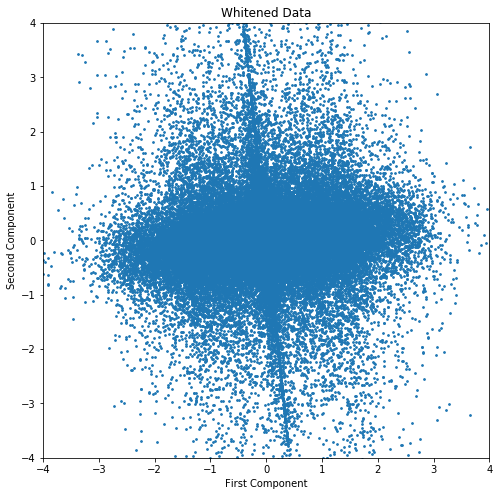

In [11]:
whiteningMatrix = np.dot(np.dot(pcVec,np.diagflat(1/np.sqrt(pcVar))),pcVec.transpose())

# Calculate whitened data by multiplying zero mean data with whitening matrix
whitenedData = np.dot(whiteningMatrix, zeroMeanData)

# Display some values:
print("\nData mean:\n", dataMean)
print("\nCovariance matrix:\n", CovData)
print("\nPrincipal components (EigenVectors):\n", pcVec)
print("\nVariances (EingenValues):\n", pcVar)
print("\nWhitening matrix:\n", whiteningMatrix)
print("\nWhitened data:\n", whitenedData)

# Plot data points:
print("\nData points:")
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
plotRange = 4
ax.set(xlim=[-plotRange,+plotRange], ylim=[-plotRange,+plotRange], title='Whitened Data', xlabel='First Component', ylabel='Second Component')
ax.scatter(whitenedData[0],whitenedData[1],s=3) 
plt.show()

## Define function for calculating Kurtosis degree for zero mean data

The contrast function is based on kurtosis degree, which will be calculated in the function implemented below.

In [12]:
def Kurtosis(zeroMeanData):
    """Calculate Kurtosis for zero mean data.
    Input: data array (dimDat x numDat).
    Outpu: Kurtosis values array for each signal (dimDat)."""
    
    variance = np.average(zeroMeanData**2,axis=1)
    moment4thOrder = np.average(zeroMeanData**4,axis=1)
    kurt = moment4thOrder - 3*variance**2
        
    return kurt

In [13]:
print(Kurtosis(whitenedData))

[0.43360008 9.26627882]


## Define contrast function for whitened data

The contrast function is a scalar function that quantifies on the basis of fourth order cumulants how non-Gaussian the components of a signal are.To sum up, the function below uses the kurtosis degree to quantify how non-Gaussian the components of the signals are.  

In [14]:
def contrastFunction(whitenedData):
    """Calculate ICA contrast function for whitened data (shall be maximized).
    Input: whitened data array (dimDat x numDat).
    Output: contrast function value (float)."""
    
    kurtDegrees = Kurtosis(whitenedData)
    contrast = np.sum(kurtDegrees**2)
        
    return contrast

In [15]:
print(contrastFunction(whitenedData))

86.05193224138337


## Find optimal rotation angle with simple method

This is a simple procedure to rotate the data such that the contrast function is maximized, i.e. such that the components are maximally non-Gaussian, which implies that the components are minimally statistically independent (as far as fourth order is concerned).

<IPython.core.display.Javascript object>


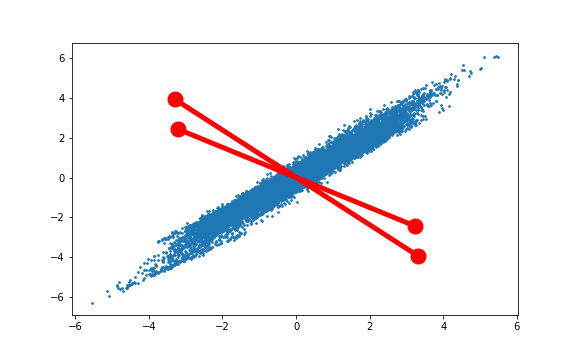

Best angle:  -3.2624743053042256
Best rotation matrix:
 [[-0.99270271 -0.12058747]
 [ 0.12058747 -0.99270271]]
Best rotated contrast:  91.02932584619533


In [25]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import time

def plt_dynamic(dataMean, bestRotationMatrix, whiteningMatrix, ax):
    '''Function to visualize the independent components through the data points'''
    ax.cla()
    ax.scatter(data[0],data[1],s=3)  # plot data points in black         
    unmixingMatrix = np.dot(bestRotationMatrix,whiteningMatrix) 
    for source in range(0,2):
        ax.plot(dataMean[0]+unmixingMatrix[source,0]*np.array((-1,+1)),dataMean[1]+unmixingMatrix[source,1]*np.array((-1,+1)), 'ro-',markersize=15,linewidth=5) # Plot +- mixing vectors in red.
    fig.canvas.draw()

plot_dinamically = True

# Start with rotation angle 0, i.e. with rotation matrix [[1,0],[0,1]] and contrast of the whitened data.
bestAngle = 0
bestRotationMatrix = np.array([[1,0],[0,1]])
bestRotatedContrast = contrastFunction(whitenedData)
angle = 0

# creates the blank canvas for futher visualization 
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.set(xlim=[dataMean[0]-plotRange,dataMean[0]+plotRange], ylim=[dataMean[1]-plotRange,dataMean[1]+plotRange], title='Mixed Data', xlabel='First Component', ylabel='Second Component')
plt.show()

# if true plot first step
if plot_dinamically:
    plt_dynamic(dataMean, bestRotationMatrix, whiteningMatrix, ax)

#run through each pre determined number of interations, changing angle value  
for iteration in np.arange(0,5,0.01):

    # Try a new rotation angle near the old one.
    angle = angle + np.random.normal(0,m.exp(-iteration))    # Vary the angle a bit, where 'a bit' gets exponentially smaller.
    rotationMatrix = np.array([[m.cos(angle),-m.sin(angle)],[m.sin(angle),m.cos(angle)]]) # Calculate new rotation matrix.
    rotatedData = np.dot(rotationMatrix,whitenedData)        # Calculate rotated whitened data.
    rotatedContrast = contrastFunction(rotatedData)          # Calculate contrast ov newly rotated whitened data.
    
    # If contrast has improved, keep the new rotation angle, matrix, and contrast, otherwise continue with the old ones.
    if rotatedContrast > bestRotatedContrast:
        bestAngle = angle
        #print m.cos(angle), m.sin(angle)                     # Print the cos and sin of the improved angle to demonstrate progress (the angle is not so useful, since it has a 2pi periodicity, and the problem has a 90° symmetry)
        bestRotationMatrix = rotationMatrix
        bestRotatedContrast = rotatedContrast    
        if plot_dinamically:
            time.sleep(.2)    
            plt_dynamic(dataMean, bestRotationMatrix, whiteningMatrix, ax)
        
# if plot_dinamically = False, plot the last iteration
plt_dynamic(dataMean, bestRotationMatrix, whiteningMatrix, ax)

# Display final result.
print("Best angle: ", bestAngle )
print("Best rotation matrix:\n", bestRotationMatrix )
print("Best rotated contrast: ", bestRotatedContrast )

## Calculate unmixing matrix and plot separated sources

Once we have estimated the optimal rotation matrix for the whitened data, we can calculate an unmixing matrix that can be applied to the mixed data to separate the sources.

In [26]:
# We multiply the rotation matrix with the data that has been whitened to find our unmixing Matrix
unmixingMatrix = np.dot(bestRotationMatrix,whiteningMatrix)

# Now we multiply the unmixing matrix with the ZeroMeanData matrix that contains our mixied signals(sounds),
#in order to untangle our sources
separatedSources = np.dot(unmixingMatrix,zeroMeanData)


<IPython.core.display.Javascript object>


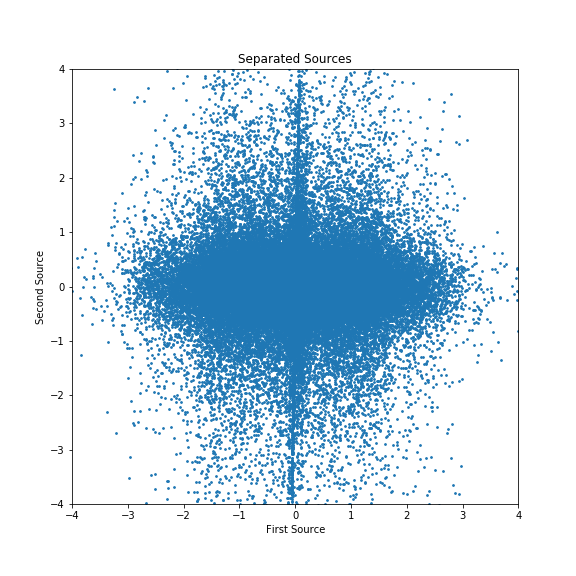

In [27]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
plotRange = 4
ax.set(xlim=[-plotRange,+plotRange], ylim=[-plotRange,+plotRange], title='Separated Sources', xlabel='First Source', ylabel='Second Source')
ax.scatter(separatedSources[0],separatedSources[1],s=3) # Plot data points.
plt.show()

The following plot shows the mixed data points in black, the true mean offset vector in yellow, the data mean vector in blue on top, the mixing vectors in green, and the unmixing vectors in red on top.  The mixing vectors are the column vectors of the mixing matrix, and the unmixing vectors are the row vectors of the unmixing matrix.  Since the polarity of the signals is arbitrary, mixing and unmixing vectors are plotted $\pm$.

Separated Source 1


Separated Source 2


Separated Source 1


<IPython.core.display.Javascript object>


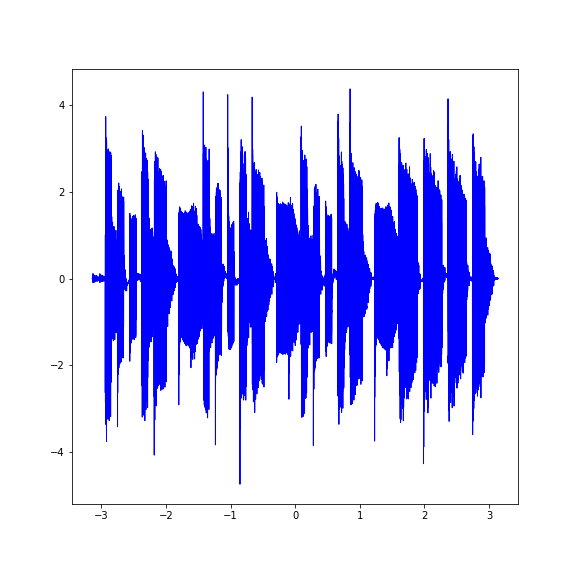

Separated Source 2


<IPython.core.display.Javascript object>


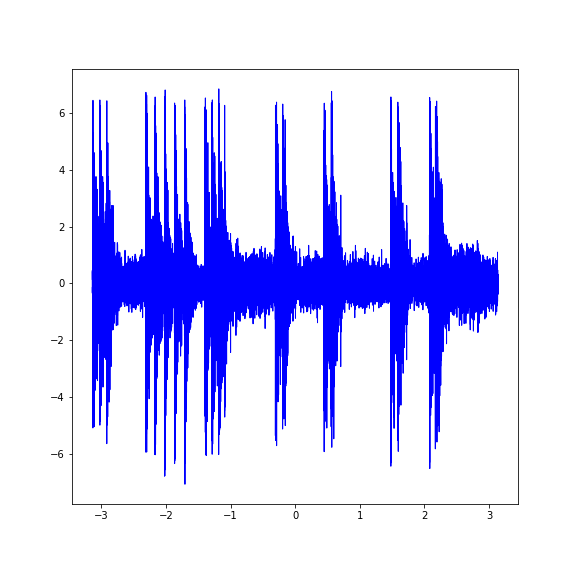

In [28]:
s1_ = separatedSources[0]
s2_ = separatedSources[1]

print("Separated Source 1")
IPython.display.display(IPython.display.Audio(data=s1_, rate=sr1))

print("Separated Source 2")
IPython.display.display(IPython.display.Audio(data=s2_, rate=sr2))

print("Separated Source 1")
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
plotRange = 4
ax.plot(time_axis, s1_, color="blue", linewidth=1.0, linestyle="-")

print("Separated Source 2")
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
plotRange = 4
ax.plot(time_axis, s2_, color="blue", linewidth=1.0, linestyle="-")
plt.show()

# Implementing FastICA for comparison

Separated Source 1


Separated Source 2


Separated Source 1


<IPython.core.display.Javascript object>


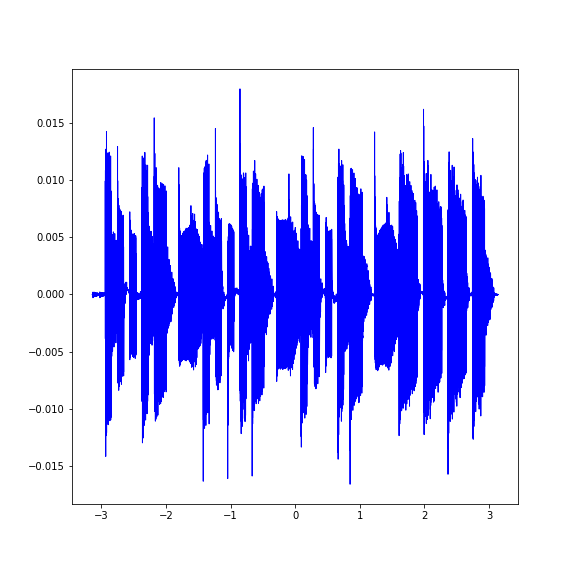

Separated Source 2


<IPython.core.display.Javascript object>


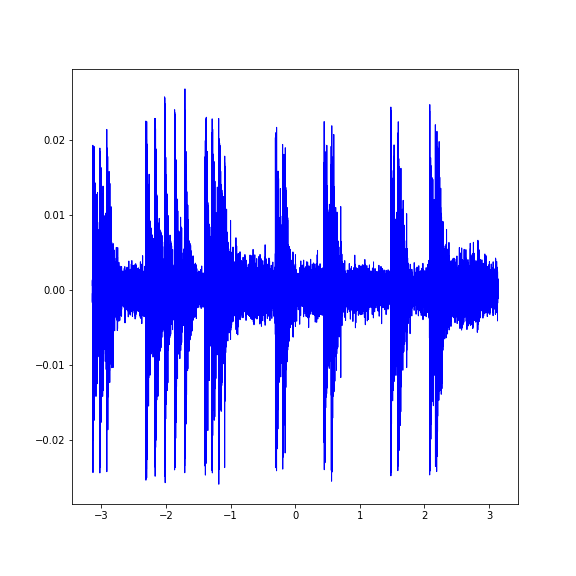

In [29]:
from sklearn.decomposition import FastICA, PCA

ica = FastICA(n_components=2, whiten=True)
S_ = ica.fit_transform(entry_data.T)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

s1_ = S_[:,0]
s2_ = S_[:,1]

print("Separated Source 1")
IPython.display.display(IPython.display.Audio(data=s1_, rate=sr1))

print("Separated Source 2")
IPython.display.display(IPython.display.Audio(data=s2_, rate=sr2))

print("Separated Source 1")
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
plotRange = 4
plt.plot(time_axis, s1_, color="blue", linewidth=1.0, linestyle="-")
plt.show() 

print("Separated Source 2")
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
plotRange = 4
plt.plot(time_axis, s2_, color="blue", linewidth=1.0, linestyle="-")
plt.show()

# Referências:

 - Hyvärinen, Aapo, and Erkki Oja. "Independent component analysis: algorithms and applications." Neural networks 13.4-5 (2000): 411-430.
 - Wiskott, Laurenz. "Lecture Notes on Independent Component Analysis."